In [ ]:
# ARIMA (Autoregressive Integrated Moving Average)
# ARIMA is a traditional statistical model used to analyze and forecast time series data. It’s best suited for data that shows patterns such as trends or seasonality.
# Autoregressive integrated moving average (ARIMA) models predict future values based on past values. ARIMA makes use of lagged moving averages to smooth time series data. They are widely used in technical analysis to forecast future security prices.

# Key Components:
# Autoregressive (AR): Refers to using past values to predict future values.
# Integrated (I): Refers to differencing the data to make it stationary (removing trends or seasonality).
# Moving Average (MA): Models the error terms as a combination of past error terms.

# When to Use ARIMA:
# When the data is linear and shows clear trends or seasonality.
# For short to medium-term forecasting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima

In [2]:
data =  pd.read_csv("../../datasets/wipro_eq_stock.csv")
# set the date as index 
data.set_index("Date" , drop=False)

print("First 5 rows \n" , data.head())

First 5 rows 
          Date Symbol Series  Prev Close   Open   High     Low    Last   Close  \
0  04-01-2010  WIPRO     EQ      680.00  685.0  697.0  675.95  696.35  693.80   
1  05-01-2010  WIPRO     EQ      693.80  696.3  708.0  693.55  707.85  704.75   
2  06-01-2010  WIPRO     EQ      704.75  706.0  710.0  687.00  693.00  690.50   
3  07-01-2010  WIPRO     EQ      690.50  695.0  695.5  675.00  678.00  678.25   
4  08-01-2010  WIPRO     EQ      678.25  679.0  680.0  666.00  666.40  668.05   

     VWAP   Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  691.08   767166  5.300000e+13     NaN              433411       0.5650  
1  699.33  1120433  7.840000e+13     NaN              706061       0.6302  
2  693.46  1029382  7.140000e+13     NaN              590142       0.5733  
3  679.45  1031096  7.010000e+13     NaN              572349       0.5551  
4  669.69   642789  4.300000e+13     NaN              270355       0.4206  


In [4]:
data["Trades"] = data["Trades"].fillna(data["Trades"].median())
print("Missing values now \n" , data.isnull().sum())
data.head()

Missing values now 
 Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,04-01-2010,WIPRO,EQ,680.00,685.0,697.0,675.95,696.35,693.80,691.08,767166,5.300000e+13,33599.5,433411,0.5650
1,05-01-2010,WIPRO,EQ,693.80,696.3,708.0,693.55,707.85,704.75,699.33,1120433,7.840000e+13,33599.5,706061,0.6302
2,06-01-2010,WIPRO,EQ,704.75,706.0,710.0,687.00,693.00,690.50,693.46,1029382,7.140000e+13,33599.5,590142,0.5733
3,07-01-2010,WIPRO,EQ,690.50,695.0,695.5,675.00,678.00,678.25,679.45,1031096,7.010000e+13,33599.5,572349,0.5551
4,08-01-2010,WIPRO,EQ,678.25,679.0,680.0,666.00,666.40,668.05,669.69,642789,4.300000e+13,33599.5,270355,0.4206


In [ ]:
# statinory test using ADF test

# a stationarity test determines if a time series data's statistical properties (like mean, variance, and autocorrelation) remain constant over time, which is a fundamental assumption for many time series models. 

from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_result = adfuller(data["Close"])

# Extract and format ADF test results
adf_output = {
    "ADF Statistic": adf_result[0],
    "p-value": adf_result[1],
    "Critical Values": adf_result[4],
    "Is Stationary": adf_result[1] <= 0.05  # Check if p-value is less than 0.05
}

adf_output

{'ADF Statistic': -2.4187225434509974,
 'p-value': 0.1365216843283873,
 'Critical Values': {'1%': -3.4329895489772104,
  '5%': -2.8627061345839557,
  '10%': -2.5673907792989072},
 'Is Stationary': False}

In [ ]:
# Apply Differencing to Make Data Stationary

In [15]:
from statsmodels.tsa.arima.model import ARIMA

# Apply Auto-ARIMA to identify the best p, d, q values
auto_arima_model = auto_arima(data["Close"], seasonal=False, trace=True, suppress_warnings=True, stepwise=True, error_action="ignore")

# Get the best order (p, d, q) from Auto-ARIMA
best_order = auto_arima_model.order
best_order


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18695.512, Time=4.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18696.547, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18696.999, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18696.984, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18695.284, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18698.899, Time=0.35 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 5.414 seconds


(0, 1, 0)

In [16]:
# Fit the optimized ARIMA model with the best order
best_model = ARIMA(data["Close"], order=(2, 1, 2))
best_model_fit = best_model.fit()

# Forecast for the test period (last 100 days)
n_test_days = 100
best_forecast = best_model_fit.forecast(steps=n_test_days)

# Extract actual data for comparison
actual_data = data["Close"].iloc[-n_test_days:]


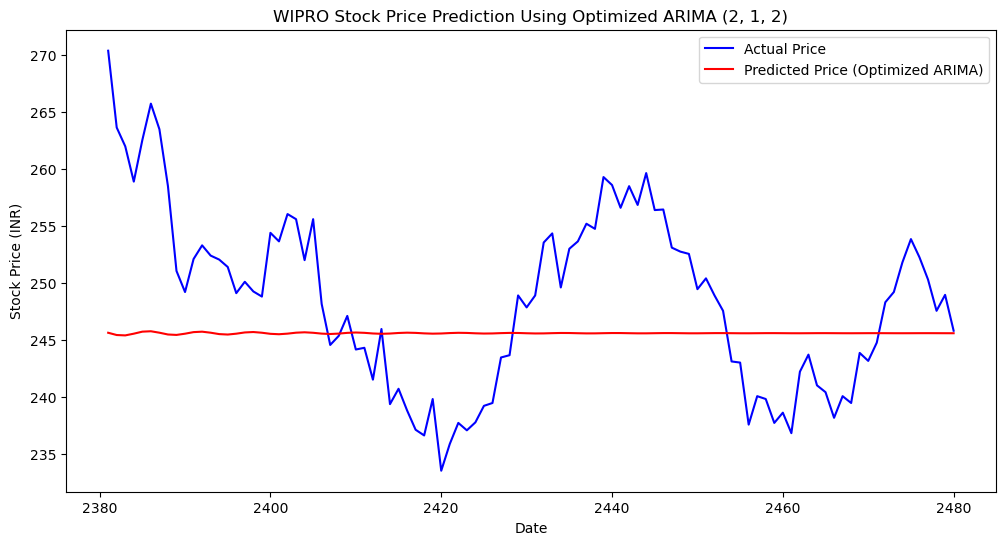

In [17]:

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(actual_data.index, actual_data, label="Actual Price", color="blue")
plt.plot(actual_data.index, best_forecast, label="Predicted Price (Optimized ARIMA)", color="red")
plt.title("WIPRO Stock Price Prediction Using Optimized ARIMA (2, 1, 2)")
plt.xlabel("Date")
plt.ylabel("Stock Price (INR)")
plt.legend()
plt.show()


In [ ]:
# The red line is almost flat, indicating that the model is predicting the future stock price as a constant (mean value) rather than capturing the actual fluctuations.